In [90]:
import requests
import pandas as pd
import io
import time
import API_info#file to keep your API key
import matplotlib.pyplot as plt

In [91]:
headers = {'authorization': 'Bearer '+API_info.API_key}
base_url = "https://public.enigma.com/api/"

In [92]:
def getEnigmaData(dataid):
    #Get the dataset current snapshot
    url = base_url + 'datasets/{}'.format(dataid)
    response = requests.get(url, headers=headers)
    json = response.json()
    snapshot_id = json['current_snapshot']['id']#get most recent snapshot of dataset

    #Get the dataset
    url = base_url + 'export/{}'.format(snapshot_id)
    print('Reading data from Enigma API to pandas...')
    startread=time.time()
    response = requests.get(url, headers=headers).content
    print('Read took '+str(time.time()-startread)+' seconds.')
    return pd.read_csv(io.StringIO(response.decode('utf-8')))

In [93]:
##########Access Enigma Public Through Pandas#############
#dataset_id = 'fa7ab996-fb43-4e86-80e7-f8e82ccba15f'
#dataset_id = 'a4fecc00-1442-4b3c-b6d5-5866feb95f8b'#Medicare drug spending 2010-2015
#dataset_id = '7f824984-adcb-4fb9-a481-00ecd3d9f0cb'#Health Interview Survey 2012

dataset_id_advevents = 'd6bad17f-ee0b-4f3d-9fa0-bb85cd7e68c0'#Curated FDA adverse events 2016
dfAdvEvents = getEnigmaData(dataset_id_advevents)

dataset_id_medspend = 'a4fecc00-1442-4b3c-b6d5-5866feb95f8b'#Medicare drug spending 2010-2015
dfMedSpend = getEnigmaData(dataset_id_medspend)

Reading data from Enigma API to pandas...
Read took 80.44035196304321 seconds.


/home/ben/anaconda3/envs/insight/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (15,28) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Reading data from Enigma API to pandas...
Read took 0.5278894901275635 seconds.


In [70]:
dfAdvEvents.keys()
#dfAdvEvents.groupby(['outc_cod_definition']).describe()

Index(['primaryid', 'caseid', 'drug_seq', 'role_cod', 'drugname', 'prod_ai',
       'val_vbm', 'route', 'dose_vbm', 'cum_dose_chr', 'cum_dose_unit',
       'dechal', 'rechal', 'lot_nbr', 'exp_dt', 'exp_dt_unparsed', 'nda_num',
       'dose_amt', 'dose_unit', 'dose_form', 'dose_freq', 'indi_drug_seq',
       'indi_pt', 'dsg_drug_seq', 'start_dt', 'start_dt_unparsed',
       'end_dt_unparsed', 'dur', 'dur_cod', 'caseversion', 'i_f_code',
       'event_dt', 'event_dt_unparsed', 'mfr_dt', 'mfr_dt_unparsed',
       'init_fda_dt', 'init_fda_dt_unparsed', 'fda_dt', 'fda_dt_unparsed',
       'rept_cod', 'auth_num', 'mfr_num', 'mfr_sndr', 'lit_ref', 'age',
       'age_cod', 'age_grp', 'sex', 'e_sub', 'wt', 'wt_cod', 'rept_dt',
       'rept_dt_unparsed', 'to_mfr', 'occp_cod', 'reporter_country',
       'occr_country', 'pt', 'drug_rec_act', 'outc_cod', 'outc_cod_definition',
       'rpsr_cod', 'rpsr_cod_definition'],
      dtype='object')

In [89]:
#check which bran name drugs are also included in the adverse drug data
print(list(set(list(dfAdvEvents.drugname)) & set(list(dfMedSpend.brand_name))))
#check which generic drugs are also included in the adverse drug data
print(sorted(list(set(list(dfAdvEvents.drugname)) & set(list(dfMedSpend.generic_name)))))

['Propranolol HCl', 'Clomipramine Hcl', 'Duloxetine HCl']
['Adalimumab', 'Aflibercept', 'Alteplase', 'Ambrisentan', 'Bendamustine HCl', 'Bevacizumab', 'Bortezomib', 'Bosentan', 'Bupropion HCl', 'Carfilzomib', 'Cetuximab', 'Denosumab', 'Duloxetine HCl', 'Enzalutamide', 'Etanercept', 'Everolimus', 'Fluticasone/Salmeterol', 'Fulvestrant', 'Ibrutinib', 'Infliximab', 'Ipilimumab', 'Ledipasvir/Sofosbuvir', 'Lenalidomide', 'Metformin HCl', 'Omalizumab', 'Pegfilgrastim', 'Propranolol HCl', 'Ranibizumab', 'Rituximab', 'Rivaroxaban', 'Sofosbuvir', 'Teriparatide', 'Trastuzumab']


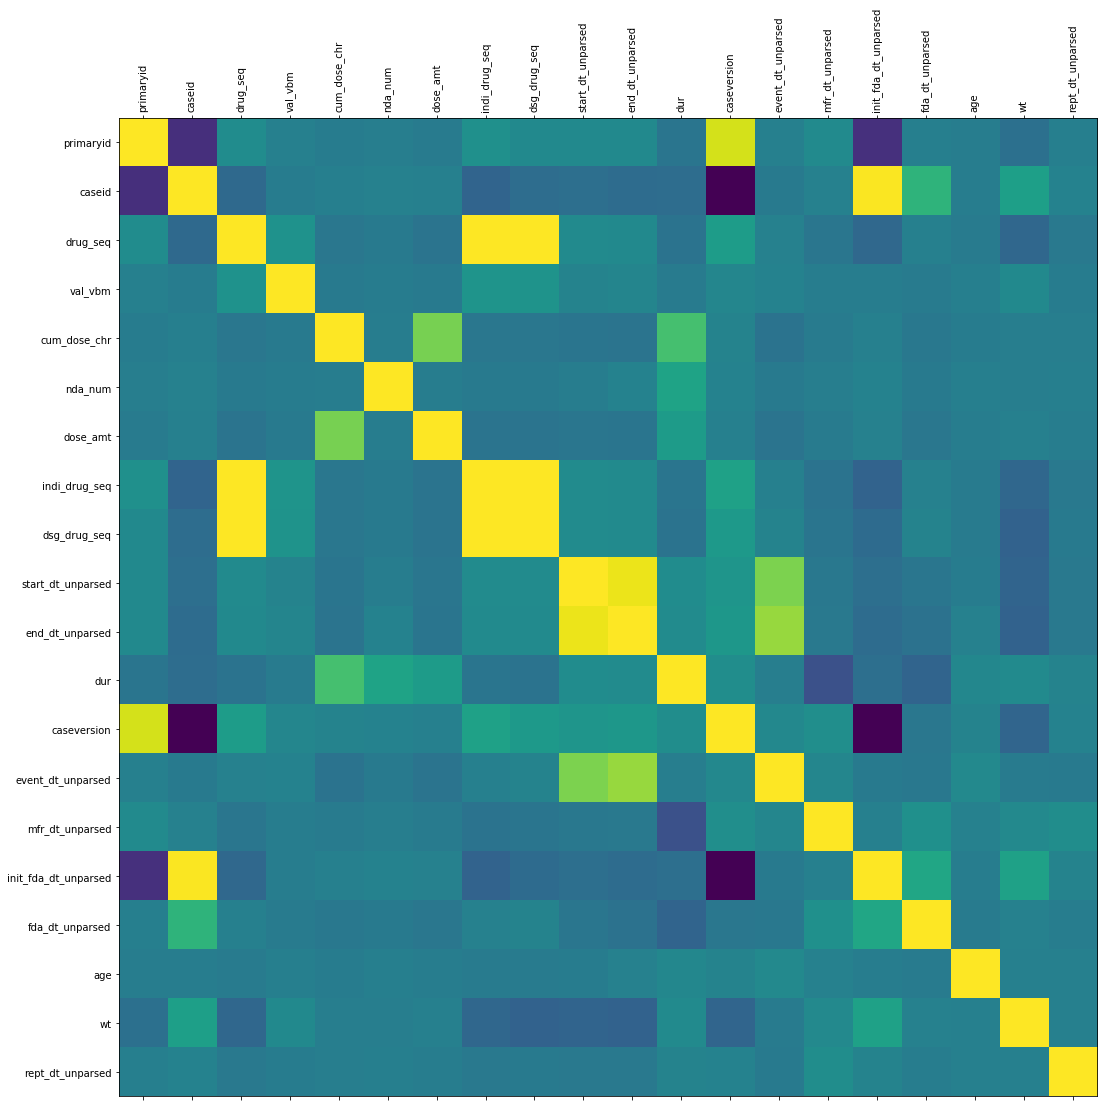

In [71]:

def plot_corr(df,size=18):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns,rotation='vertical');
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.show()
    
plot_corr(df.corr())